In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data = pd.read_csv('AmazonReview.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [19]:
data['Sentiment'].value_counts()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    5000
Name: count, dtype: int64

In [18]:
data.groupby('Sentiment').size()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    5000
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1 

In [22]:
stp_words=stopwords.words('english')
def clean_review(review): 
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview 

data['Review']=data['Review'].apply(clean_review)

In [23]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [24]:
data['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

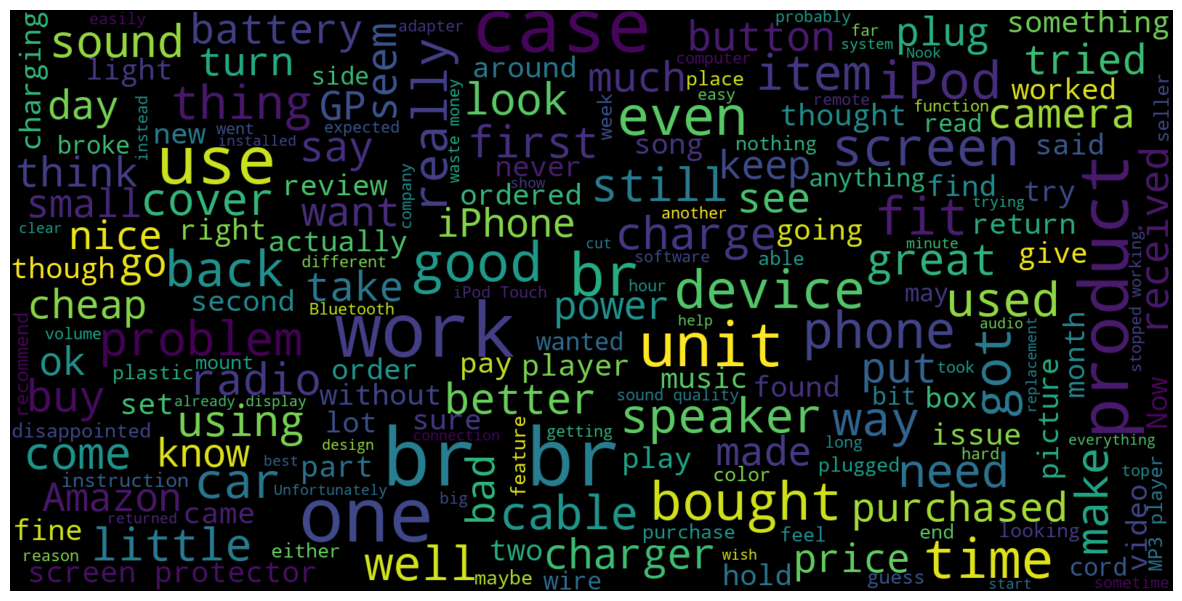

In [25]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

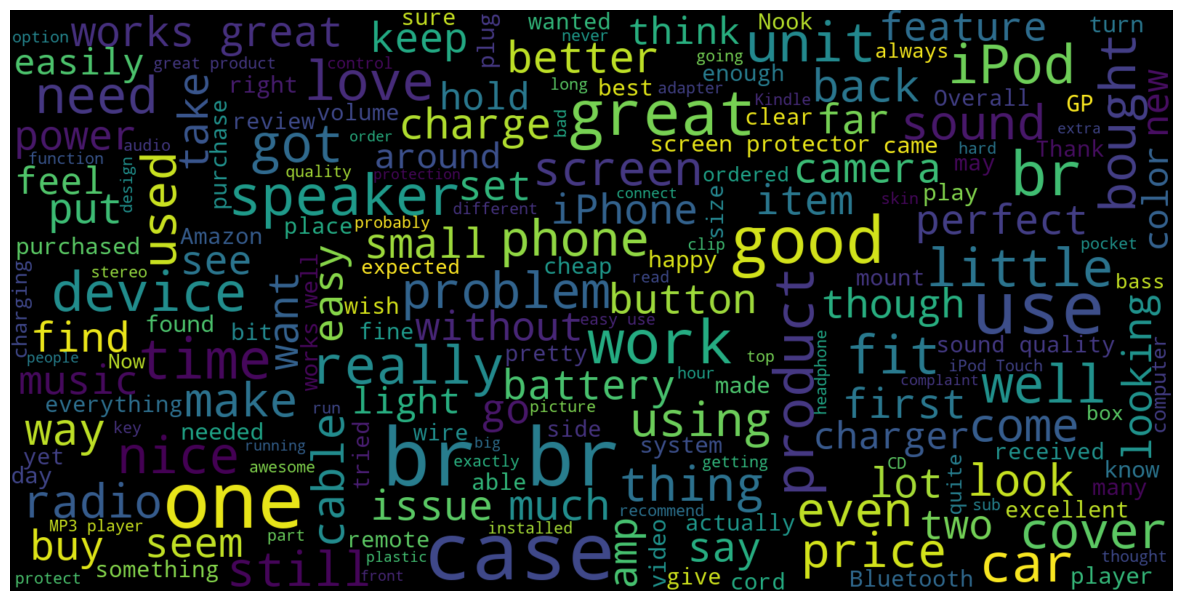

In [26]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [28]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

0.816


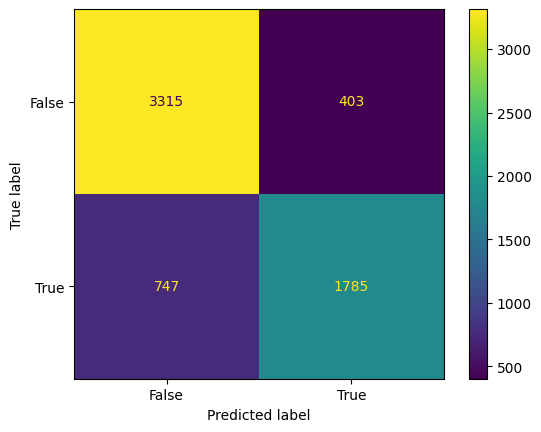

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


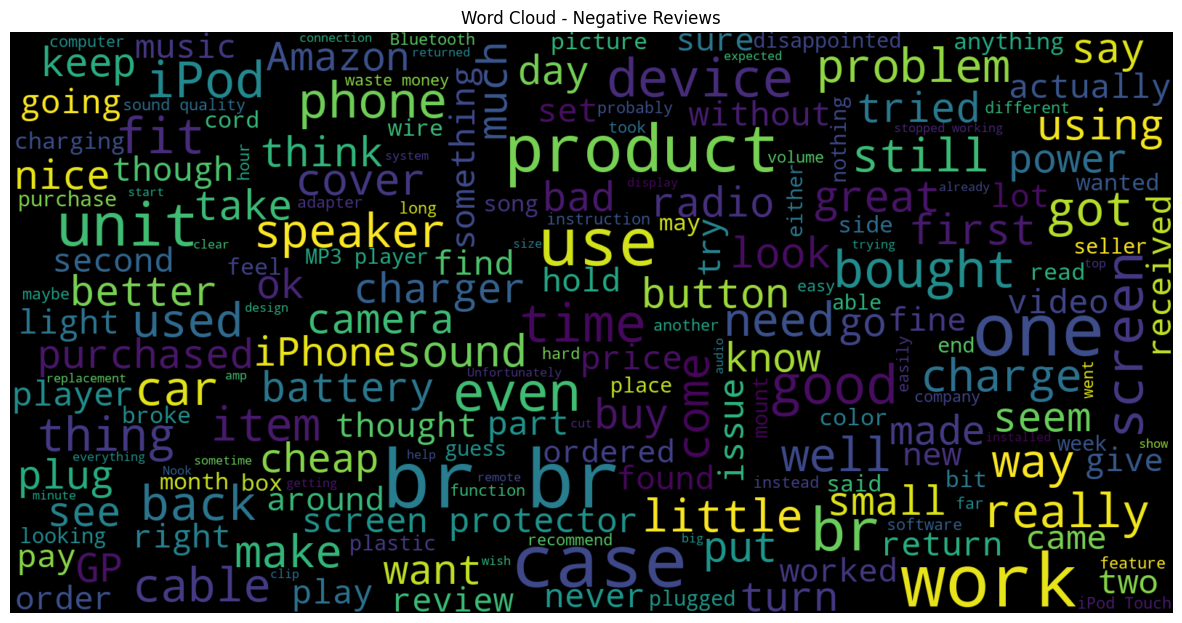

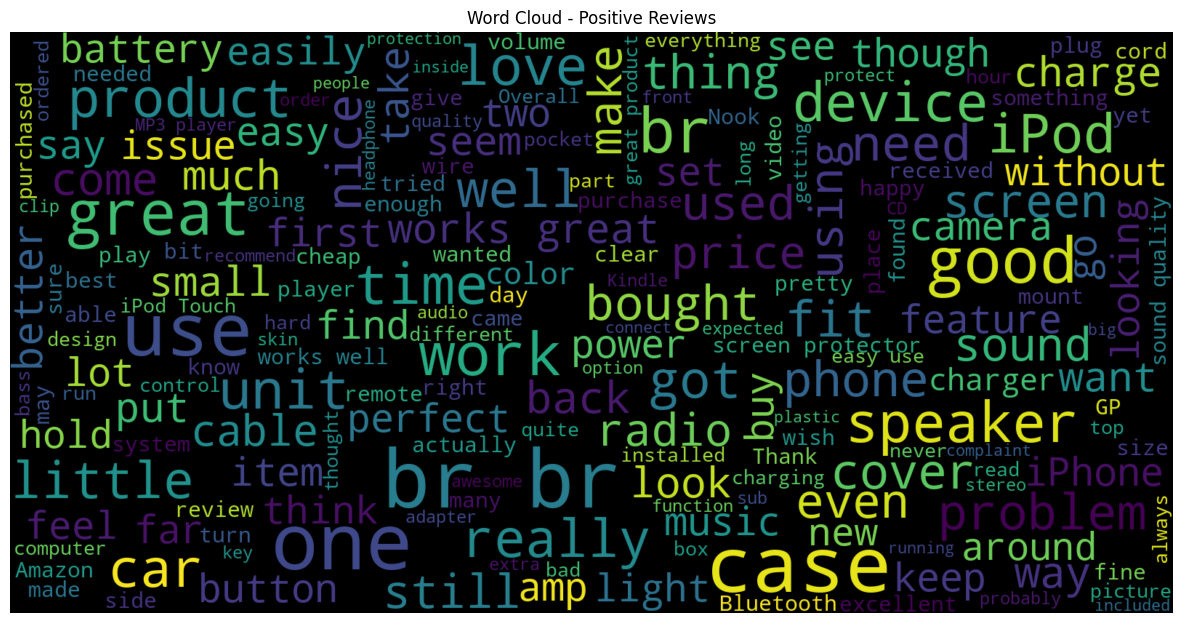

Accuracy: 0.8114


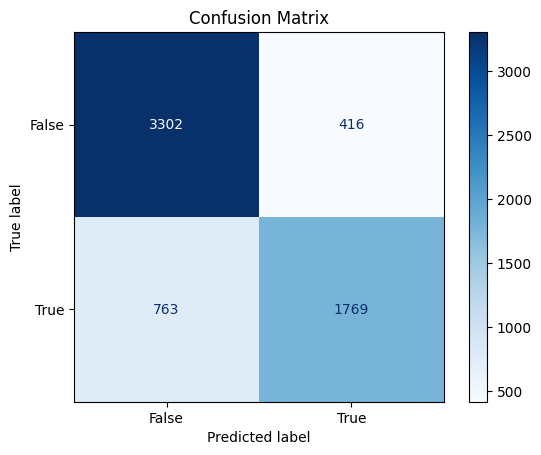

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset and drop missing values
data = pd.read_csv('AmazonReview.csv')
data.dropna(inplace=True)

# Binary classification (0 = negative, 1 = positive)
data['Sentiment'] = data['Sentiment'].apply(lambda x: 0 if x <= 3 else 1)

# Define stopwords
stp_words = stopwords.words('english')

# Function to clean reviews
def clean_review(review):
    return " ".join(word for word in review.split() if word.lower() not in stp_words)

# Apply cleaning to the Review column
data['Review'] = data['Review'].apply(clean_review)

# Generate WordCloud for negative reviews
negative_reviews = ' '.join(data['Review'][data['Sentiment'] == 0].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110).generate(negative_reviews)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()

# Generate WordCloud for positive reviews
positive_reviews = ' '.join(data['Review'][data['Sentiment'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110).generate(positive_reviews)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

# TF-IDF Vectorization with 2500 max features
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review']).toarray()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, data['Sentiment'], test_size=0.25, random_state=42)

# Initialize and train Logistic Regression model with hyperparameter tuning
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(x_train, y_train)

# Predict on test data
pred = model.predict(x_test)

# Model accuracy
print(f'Accuracy: {accuracy_score(y_test, pred):.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],       # Regularization
    'C': [0.01, 0.1, 1, 10],       # Inverse of regularization strength
    'max_iter': [100, 500, 1000]    # Maximum number of iterations
}

# Initialize Logistic Regression model
model = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search model
grid_search.fit(x_train, y_train)

# Best hyperparameters from GridSearch
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Test accuracy using the best found hyperparameters
best_model = grid_search.best_estimator_
pred = best_model.predict(x_test)
print(f'Optimized Accuracy: {accuracy_score(y_test, pred):.4f}')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution
param_dist = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),  # Testing values between 0.001 and 1000
    'max_iter': [100, 500, 1000]
}

# Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, 
                                   n_iter=10, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(x_train, y_train)

# Best hyperparameters from RandomizedSearch
print(f'Best Hyperparameters: {random_search.best_params_}')

# Test accuracy using the best found hyperparameters
best_random_model = random_search.best_estimator_
pred = best_random_model.predict(x_test)
print(f'Optimized Accuracy: {accuracy_score(y_test, pred):.4f}')
